In [15]:
import nltk
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

amazon_df=pd.read_csv('BookReviews.csv')
amazon_df
amazon_df['Label']=amazon_df['Label'].map({'__label__2 ':1,'__label__1 ':0})
y=amazon_df['Label']
amazon_df.drop(columns='Label',axis=1,inplace=True)
X_train,X_test,y_train,y_test=train_test_split(amazon_df,y,random_state=42,test_size=0.2)

In [16]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer

tokenizer= RegexpTokenizer(r'\w+')
lemmatizer= WordNetLemmatizer()
stemmer=PorterStemmer()

def preprocessing(review):
    
    final_tokens=' '
    tokens=tokenizer.tokenize(review)
    pure_tokens=[token.lower() for token in tokens if token.lower() not in stopwords.words('english')]
    lemmas_tokens=[lemmatizer.lemmatize(pure_token) for pure_token in pure_tokens]
    

    final_tokens=final_tokens.join(lemmas_tokens)
    
    return final_tokens
X_train['Cleaned_text']=X_train['Review'].apply(preprocessing)

X_train['Cleaned_text']

X_test['Cleaned_text']=X_test['Review'].apply(preprocessing)

X_test['Cleaned_text']

C:\Users\sadrool haque\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\sadrool haque\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


82     dirty south probably best southside cd ever co...
15     try fool u fake review glaringly obvious glowi...
111    load fun 6 year old 5 year old really enjoy ga...
177    make fascinating reading whale naturalist anim...
76     bad deal ordered dvd received substitute never...
163    excellent product alphabet block beautiful cou...
68     great combination creativity adventure 4 year ...
67     even mommy fun one four year old daughter love...
120    worth wait jmm never released bad album many w...
173    worth investment great set block researched di...
176    small work small compared thought would even w...
148    three four star depending classic drawing room...
65     profound truly horrible narrative style work f...
30     incorrect disc big jvc fan like model suspisci...
86     drew air book drew air pretty bad idea someone...
85     little one maid israel bill harvey wonderful g...
55     good received defective book bought book movin...
60     homer moses extremely he

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer= TfidfVectorizer(stop_words='english',use_idf=True)
vectorizer.fit(X_train['Cleaned_text'])
X_train_TfIdf=vectorizer.transform(X_train['Cleaned_text'])
X_test_TfIdf=vectorizer.transform(X_test['Cleaned_text'])



C:\Users\sadrool haque\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

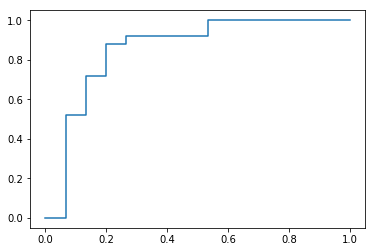

In [18]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score,f1_score
import matplotlib.pyplot as plt

clf= MultinomialNB().fit(X_train_TfIdf.toarray(),y_train)

X_test['Cleaned_text']=X_test['Review'].apply(preprocessing)

X_test_TfIdf=vectorizer.transform(X_test['Cleaned_text'])
                                  
y_pred= clf.predict(X_test_TfIdf.toarray())
                                  
confusion_matrix(y_test,y_pred)
                                 
y_proba_pred=clf.predict_proba(X_test_TfIdf.toarray())[::,1]
                                  
fpr,tpr,thresholds=roc_curve(y_test,y_proba_pred)
                    
plt.plot(fpr,tpr)
                                  
y_pred

In [19]:
y_proba_pred

array([0.58297658, 0.43025728, 0.72332574, 0.5832087 , 0.44786743,
       0.70415467, 0.70072481, 0.71553202, 0.73727658, 0.76385372,
       0.53648387, 0.50752101, 0.56376605, 0.4823114 , 0.4464437 ,
       0.74485491, 0.58006492, 0.57731168, 0.33619505, 0.68738314,
       0.69714422, 0.55878286, 0.63938704, 0.71362035, 0.65422215,
       0.59364606, 0.38211033, 0.66352231, 0.59434824, 0.65884991,
       0.48719553, 0.61154284, 0.64546191, 0.83730774, 0.66868883,
       0.73307879, 0.48922184, 0.48940007, 0.53060488, 0.49454294])

In [20]:
from sklearn.linear_model import LogisticRegression
logr= LogisticRegression()
logr.fit(X_train_TfIdf,y_train)

y_pred_1= logr.predict(X_test_TfIdf)
y_pred_1




C:\Users\sadrool haque\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1], dtype=int64)

In [21]:
confusion_matrix(y_test,y_pred_1)

array([[ 7,  8],
       [ 2, 23]], dtype=int64)

In [22]:
f1_score(y_test,y_pred_1)

0.8214285714285714

In [23]:
from sklearn.svm import SVC
sv= SVC(kernel='linear')
sv.fit(X_train_TfIdf,y_train)
y_pred_2= sv.predict(X_test_TfIdf)
y_pred_2

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0], dtype=int64)

In [24]:
f1_score(y_test,y_pred_2)

0.8846153846153846